# 02 데이터 전처리 1

1. 데이터를 임시로 로딩해서 데이터를 살펴봅니다.
2. 중복행이 있는지 살펴봅니다.
3. 데이터형식을 필요에 맞게 변경합니다. 특히 날짜형식
4. NaN와 이상치를 처리합니다.

## 1. 데이터 '임시' 로딩

**왜, 임시로 로딩을 할까?**
1. 데이터 타입들이 뭔지 모름
2. row가 몇 개인지 모름


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# nrows 파라미터를 이용하여 불러올 행의 수를 제한한다.
temp_loading = pd.read_csv('ade_sales.csv', nrows=1000)

In [3]:
# 항상 shape를 살펴보자.
temp_loading.shape

(32, 7)

In [4]:
temp_loading.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25


In [5]:
temp_loading.tail()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
27,7/27/2016,Park,104,68,80,99.0,0.35
28,7/28/2016,Park,96,63,82,90.0,0.35
29,7/29/2016,Park,100,66,81,95.0,0.35
30,7/30/2016,Beach,88,57,82,81.0,0.35
31,7/31/2016,Beach,76,47,82,68.0,0.35


**아래의 코드 셀을 실행 시켜보자.**  
이상한 점이 두 개 있다. 찾아서 확인하자.


In [6]:
temp_loading.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


## 2. 중복된 행을 대하는 태도.

1. 정말 진짜 아무 필요 없이 중복되었다? -> 지움.
2. '왜' 이런것이 수집되었는가. <- 매우 심각하게 고민해야 할 부분

In [7]:
temp_loading.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

In [8]:
temp_loading[temp_loading.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,7/6/2016,Beach,103,69,82,90.0,0.25


In [11]:
temp_loading[4:9]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
4,7/5/2016,Beach,159,118,78,135.0,0.25
5,7/6/2016,Beach,103,69,82,90.0,0.25
7,7/7/2016,Beach,143,101,81,135.0,0.25
8,7/8/2017,Beach,123,86,82,113.0,0.25
9,7/9/2016,Beach,134,95,80,126.0,0.25


In [10]:
# 중복 행 제거 : .drop_duplicates
temp_loading.drop_duplicates(inplace=True)

In [12]:
# 행 index를 reset : row가 제거되면, 항상 해주는 것이 좋다.
temp_loading = temp_loading.reset_index(drop=True)

In [13]:
temp_loading.duplicated().sum()

0

In [14]:
temp_loading

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25
5,7/6/2016,Beach,103,69,82,90.0,0.25
6,7/7/2016,Beach,143,101,81,135.0,0.25
7,7/8/2017,Beach,123,86,82,113.0,0.25
8,7/9/2016,Beach,134,95,80,126.0,0.25
9,7/10/2016,Beach,140,98,82,131.0,0.25


## 3. 날짜 형식 변경하기

In [15]:
temp_loading.dtypes

Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object

In [16]:
# 코드 실행 후, 날짜 반드시 확인.  최악의 경우 기나긴 코딩/수작업이 필요하다.
temp_loading['Date'] = pd.to_datetime(temp_loading['Date'])
# temp_loading['Date'] = temp_loading['Date'].astype('datetime64')

In [17]:
temp_loading.dtypes

Date           datetime64[ns]
Location               object
Lemon                   int64
Orange                  int64
Temperature             int64
Leaflets              float64
Price                 float64
dtype: object

## 4. NaN 값을 다루는 방법

### 4.1 NaN 찾기
**.isnull = .isna**  <-- 둘은 같음. 그러나 isna를 더 많이 사용.


In [19]:
# 전체 값중 NaN여부 확인
temp_loading.isna()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [20]:
# 칼럼(변수)중 NaN이 하나라도 있는지 여부 확인
temp_loading.isna().any()

Date           False
Location       False
Lemon          False
Orange         False
Temperature    False
Leaflets        True
Price          False
dtype: bool

In [22]:
# 칼럼(변수)중 NaN이 몇개 있는지 확인
temp_loading.isna().sum()

Date           0
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [21]:
# 칼럼(변수)중 NaN이 있는 행번호 찾기 확인. any( 숫자) ==> 0 : 열단위, 1 : 행단위
temp_loading.isna().any(1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool

In [23]:
# zero가 아닌 값이 있는 index 가져오기
temp_loading.isna().any(1).nonzero()

(array([19], dtype=int64),)

Leaflets의, 19번 row에 문제가 있다. 그 주변을 눈으로 확인하자.

In [24]:
temp_loading[['Leaflets']][15:24]

,Leaflets
15,90.0
16,126.0
17,122.0
18,113.0
19,NaN
20,90.0
21,108.0
22,117.0
23,117.0


### 4.3 NaN 조치하기
중요한 변수라면 반드시 NaN을 조치해야 합니다.


**1) NaN이 들어간 행을 제거**   
왠만하면 권장하지 않습니다.

In [25]:
#원본에서 하나 복사합시다.
temp2 = temp_loading.copy()

In [26]:
temp2[15:24]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
15,2016-07-16,Beach,81,50,74,90.0,0.5
16,2016-07-17,Beach,115,76,77,126.0,0.5
17,2016-07-18,Park,131,92,81,122.0,0.5
18,2016-07-19,Park,122,85,78,113.0,0.5
19,2016-07-20,Park,71,42,70,NaN,0.5
20,2016-07-21,Park,83,50,77,90.0,0.5
21,2016-07-22,Park,112,75,80,108.0,0.5
22,2016-07-23,Park,120,82,81,117.0,0.5
23,2016-07-24,Park,121,82,82,117.0,0.5


In [27]:
temp2.dropna(inplace = True)

In [28]:
temp2[15:24]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
15,2016-07-16,Beach,81,50,74,90.0,0.5
16,2016-07-17,Beach,115,76,77,126.0,0.5
17,2016-07-18,Park,131,92,81,122.0,0.5
18,2016-07-19,Park,122,85,78,113.0,0.5
20,2016-07-21,Park,83,50,77,90.0,0.5
21,2016-07-22,Park,112,75,80,108.0,0.5
22,2016-07-23,Park,120,82,81,117.0,0.5
23,2016-07-24,Park,121,82,82,117.0,0.5
24,2016-07-25,Park,156,113,84,135.0,0.5


**2) 특정값으로 채우기**   

In [29]:
#원본에서 하나 복사합시다.
temp2 = temp_loading.copy()
temp2[15:24]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
15,2016-07-16,Beach,81,50,74,90.0,0.5
16,2016-07-17,Beach,115,76,77,126.0,0.5
17,2016-07-18,Park,131,92,81,122.0,0.5
18,2016-07-19,Park,122,85,78,113.0,0.5
19,2016-07-20,Park,71,42,70,NaN,0.5
20,2016-07-21,Park,83,50,77,90.0,0.5
21,2016-07-22,Park,112,75,80,108.0,0.5
22,2016-07-23,Park,120,82,81,117.0,0.5
23,2016-07-24,Park,121,82,82,117.0,0.5


In [30]:
# 0으로 채우기
temp2.fillna(0)

# 0으로 채우고 저장하려면  inplace = True 를 포함시켜야 합니다.
# temp_ma.fillna(0, inplace = True)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2017-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


In [31]:
#직전값으로 채우기
temp2.fillna(method = 'ffill')

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2017-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


In [33]:
#직후 값으로 채우기
temp2.fillna(method = 'bfill')

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2017-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


# **3) 의미있게 채우기**

    * 평균
    * 근처만의 평균 (ex> 과거2일 ~ 다음 2일)
    * 최빈값, 중앙값 등
    * 그 날과 같은/비슷한 feature를 갖는 날들의 평균
            
[fillna 링크 참고](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

**예시1 : 과거 2일 ~ 다음 2일로 평균 채워 넣기**

* 채워 넣고 나서, 문제점이 있는지 찾아봅시다.

In [ ]:
# 일단 복사해 놓고 시작합시다.
temp2 = temp_loading.copy()

In [34]:
temp2[17:22]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
17,2016-07-18,Park,131,92,81,122.0,0.5
18,2016-07-19,Park,122,85,78,113.0,0.5
19,2016-07-20,Park,71,42,70,NaN,0.5
20,2016-07-21,Park,83,50,77,90.0,0.5
21,2016-07-22,Park,112,75,80,108.0,0.5


In [35]:
# 우리는 아래와 같은 방법으로 진행합니다.
temp2.loc[19, 'Leaflets'] = temp_loading.loc[17:22, 'Leaflets'].mean()

In [36]:
temp2[17:22]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
17,2016-07-18,Park,131,92,81,122.0,0.5
18,2016-07-19,Park,122,85,78,113.0,0.5
19,2016-07-20,Park,71,42,70,110.0,0.5
20,2016-07-21,Park,83,50,77,90.0,0.5
21,2016-07-22,Park,112,75,80,108.0,0.5


**실습1 : 전체 평균으로 채워 넣기**

In [37]:
temp_ta = temp_loading.copy()

In [56]:
temp_ta.loc[19, 'Leaflets'] = temp_loading['Leaflets'].mean()

In [53]:
temp_ta['Leaflets'] = temp_ta['Leaflets'].round()

In [55]:
temp_loading.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,31.000000,31.000000,31.000000,30.000000,31.000000
mean,116.580645,80.354839,78.870968,109.166667,0.358065
std,26.136532,22.130745,4.096681,20.159850,0.113355
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.500000,77.000000,91.250000,0.250000
50%,115.000000,77.000000,80.000000,108.000000,0.350000
75%,132.500000,95.000000,82.000000,125.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


In [57]:
temp_ta[15:24]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
15,2016-07-16,Beach,81,50,74,90.000000,0.5
16,2016-07-17,Beach,115,76,77,130.000000,0.5
17,2016-07-18,Park,131,92,81,120.000000,0.5
18,2016-07-19,Park,122,85,78,110.000000,0.5
19,2016-07-20,Park,71,42,70,109.166667,0.5
20,2016-07-21,Park,83,50,77,90.000000,0.5
21,2016-07-22,Park,112,75,80,110.000000,0.5
22,2016-07-23,Park,120,82,81,120.000000,0.5
23,2016-07-24,Park,121,82,82,120.000000,0.5


**실습2 : 중앙값으로 채워 넣기**

중앙값(median)을 구하는 방법은 여러가지 있습니다. 찾아보세요~!

In [41]:
temp_tm = temp_loading.copy()

In [42]:
temp_tm.loc[19, 'Leaflets'] = temp_loading['Leaflets'].median()

In [58]:
temp_tm

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2017-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


**실습3 : 그 날과 같은/비슷한 feature를 갖는 날들의 평균으로 채워 넣기**

* 코드 한 줄로 깔끔하게 되는 방법 없습니다.
* 엑셀 수작업, SQL 쿼리, 판다스 무엇을 이용해도 좋습니다.
* 다만, **어떤 방식으로, 왜 그렇게 했는지 설명 가능해야 합니다.**

In [59]:
temp_knn = temp_loading.copy()

In [68]:
temp_knn

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
6,2016-07-07,Beach,143,101,81,135.0,0.25
7,2017-07-08,Beach,123,86,82,113.0,0.25
8,2016-07-09,Beach,134,95,80,126.0,0.25
9,2016-07-10,Beach,140,98,82,131.0,0.25


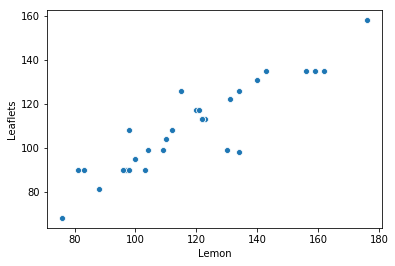

In [81]:
sns.scatterplot(x="Lemon", y="Leaflets", data=temp_knn)

**실습4 : 또 다른 아이디어가 있다면 시도해보세요**


In [ ]:
temp_another = temp_loading.copy()

## 일단, 저장.

아직 끝나지 않았습니다.^^  
temp2를 저장했지만, 자기가 원하는 다른 것을 저장해도 좋다.

In [82]:
temp2.to_csv('ade_temp1.csv', index=False)

### 4.3 NaN을 채우는 또다른 사례

titanic 데이터셋을 가지고 진행합니다.

In [83]:
# 데이터 셋 불러옵니다.
ti = pd.read_csv('titanic_simple.csv')

In [90]:
# 데이터셋을 가져온 후에 기본적으로 점검해야 할 사항들을 살펴봅시다.

# Shape
ti.shape

# 상위, 하위 데이터
ti.head()

# 칼럼별 데이터타입
ti.dtypes

# describe()
ti.describe()

# 칼럼별 NaN 갯수 확인
ti.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Embarked         2
dtype: int64

In [91]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


칼럼별 NaN의 갯수를 확인하셨지요?  
Age는 중요한 변수일텐데, 결측치가 많습니다.   
어떻게 처리하면 좋을까요?  
① 제거?  
② 값채우기?  
③ 데이터셋 분리하여 각각 모델링?

우리는 값을 채우는 방법을 적용해 봅시다.   
그렇다면 값을 어떻게 채우면 좋을까요?

In [92]:
ti2 = ti.copy()

In [93]:
# 새로운 칼럼을 만들고 빈 값으로 채웁니다.
ti2['Title'] = ''

In [94]:
ti2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton,


In [95]:
ti2.Name.str.contains('Mr[.]').head(10)

0     True
1    False
2    False
3    False
4     True
5     True
6     True
7    False
8    False
9    False
Name: Name, dtype: bool

Mr[.] <== []는 왜 붙였을까요?  
이에 대해서 더 많은 정보가 궁금하시다면, [정규표현식](https://wikidocs.net/4308) 을 학습하세요.  


In [104]:
#이름에 'Mr.'이 들어간 사람들 다 보여줘~
ti2.loc[ti2.Name.str.contains('Mr[.]')]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Queenstown,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,Southhampton,Mr
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southhampton,
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg,
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,Southhampton,Mr
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,31.2750,Southhampton,Mr


In [97]:
# 이름에 'Mr.'이 들어간 사람들의 Title에 'Mr'이라고 호칭을 넣어주자
ti2.loc[ti2.Name.str.contains('Mr[.]'), 'Title'] = 'Mr'

In [98]:
ti2.loc[ti2.Name.str.contains('Mr[.]')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Queenstown,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,Southhampton,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,8.0500,Southhampton,Mr


In [99]:
# 호칭이 Mr인 사람들의 평균 나이
mr_avg = ti2.loc[ti2.Title=='Mr' , "Age"].mean()

# mr_avg

In [105]:
# 호칭이 Mr인 사람들 중 Age가 Na(NaN)인 사람들에게, Mr인 사람들의 평균 나이로 채우기
ti2.loc[(ti2.Title=='Mr') & (ti2['Age'].isna()), "Age"] = mr_avg

In [106]:
ti2.loc[(ti2.Title=='Mr') & (ti2['Age'].isna())] 

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title


### 실습 
이제 나이가 NaN인 사람들의 호칭을 살펴보고, 위와 동일한 절차로 Age의 NaN값을 처리하시오.

In [107]:
# 1. ti를 ti2로 복사하시오
ti2 = ti.copy()

In [123]:
# 2. ti2의 이름에서 호칭을 분리하여 Title에 담으시오.
ti2['Title'] = ''
ti2.loc[ti2.Name.str.contains('Mr[.]'), 'Title'] = 'Mr'
ti2.loc[ti2.Name.str.contains('Mrs[.]'), 'Title'] = 'Mrs'
ti2.loc[ti2.Name.str.contains('Miss[.]'), 'Title'] = 'Miss'
ti2.loc[ti2.Name.str.contains('Master[.]'), 'Title'] = 'Master'
ti2.loc[ti2.Name.str.contains('Dr[.]'), 'Title'] = 'Dr'
ti2[ti2['Title'] == '']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Age2
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,27.7208,Cherbourg,,40.0
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,13.0000,Southhampton,,42.0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,12.5250,Southhampton,,51.0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,26.0000,Southhampton,,54.0
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,69.3000,Cherbourg,,24.0
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,13.0000,Southhampton,,28.0
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,30.5000,Southhampton,,52.0
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,26.5500,Southhampton,,45.0
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,39.6000,Cherbourg,,48.0
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,56.9292,Cherbourg,,49.0


In [124]:
# 3. Age를 반올림(.round())하여 Age2에 담으시오.
ti2['Age2'] = ti2.Age.round()
ti2.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton,Mr,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,Mrs,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton,Miss,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton,Mr,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Queenstown,Mr,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,Southhampton,Mr,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,Southhampton,Master,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southhampton,Mrs,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg,Mrs,14.0


In [125]:
# 4. 호칭별 Age2의 중앙값(median())을 구하시오.
mr_med = ti2.loc[ti2.Title=='Mr' , "Age2"].median()
mrs_med = ti2.loc[ti2.Title=='Mrs' , "Age2"].median()
miss_med = ti2.loc[ti2.Title=='Miss' , "Age2"].median()
master_med = ti2.loc[ti2.Title=='Master' , "Age2"].median()
dr_med = ti2.loc[ti2.Title=='Dr' , "Age2"].median()


In [126]:
# 5. Age2가 NaN에 대해서 호칭별 중앙값으로 대체하시오.
ti2.loc[(ti2.Title=='Mr') & (ti2['Age'].isna()), "Age2"] = mr_med
ti2.loc[(ti2.Title=='Mrs') & (ti2['Age'].isna()), "Age2"] = mrs_med
ti2.loc[(ti2.Title=='Miss') & (ti2['Age'].isna()), "Age2"] = miss_med
ti2.loc[(ti2.Title=='Master') & (ti2['Age'].isna()), "Age2"] = master_med
ti2.loc[(ti2.Title=='Dr') & (ti2['Age'].isna()), "Age2"] = dr_med

ti2.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton,Mr,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg,Mrs,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton,Miss,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton,Mrs,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton,Mr,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583,Queenstown,Mr,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625,Southhampton,Mr,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750,Southhampton,Master,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333,Southhampton,Mrs,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708,Cherbourg,Mrs,14.0


## 5. 이상치를 다루는 방법

In [127]:
# titanic 데이터를 가져옵니다.
ti = pd.read_csv('titanic_simple.csv')

In [128]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


#### 연속형 변수인 Age에 대해서 살펴봅시다.

### 5.1 Age에 대한 차트와 기초 통계량을 살펴봅시다.

In [129]:
import seaborn as sns

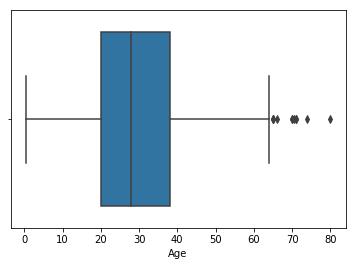

In [130]:
sns.boxplot( y="Age", data=ti, orient = 'h')

In [131]:
ti['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\Gilbert Han\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


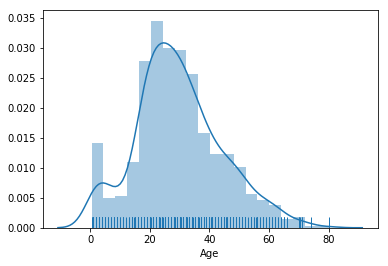

In [132]:
sns.distplot(ti[ti["Age"].notnull()]["Age"], rug = True)

### 5.2 IQR을 이용한 방식으로 이상치를 구별해 봅시다.

In [133]:
q1 = ti['Age'].quantile(.25)
q3 = ti['Age'].quantile(.75)

iqr = q3-q1
iqr

17.875

In [134]:
min_iqr = q1 - 1.5 * iqr
max_iqr = q3 + 1.5 * iqr
print(min_iqr, max_iqr)

-6.6875 64.8125


min_iqr과 max_iqr이 실제 min ~ max 범위를 벗어날 수는 없습니다.  
그러므로 만약 min_iqr < min 이라면 min_iqr은 min의 값으로 대체되어야 합니다.

In [135]:
min_from_all = ti['Age'].min()
max_from_all = ti['Age'].max()

In [ ]:
# ti['Age'].describe().loc['min']

In [136]:
if (min_iqr < min_from_all) :
    min_iqr = min_from_all
if (max_iqr > max_from_all) :
    max_iqr = max_from_all
print(min_iqr, max_iqr)

0.42 64.8125


#### 이제 min_iqr ~ max_iqr 범위 밖의 데이터를 조회해 봅시다.

In [137]:
(ti['Age'] < min_iqr ) | (ti['Age'] > max_iqr)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [138]:
ti[(ti['Age'] < min_iqr ) | (ti['Age'] > max_iqr)]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,10.5000,Southhampton
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,61.9792,Cherbourg
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,34.6542,Cherbourg
116,117,0,3,"Connors, Mr. Patrick",male,70.5,7.7500,Queenstown
280,281,0,3,"Duane, Mr. Frank",male,65.0,7.7500,Queenstown
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,26.5500,Southhampton
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,49.5042,Cherbourg
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0000,Southhampton
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,10.5000,Southhampton
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,71.0000,Southhampton


* 이들의 나이는 이상치인가요?

### 실습 : Fare에 대해서 이상치를 판별해 보시오.

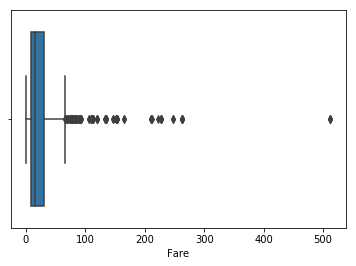

In [139]:
# 1) 박스플롯과 히스토그램으로 이상치인지 살펴 보세요.
sns.boxplot( y="Fare", data=ti, orient = 'h')

C:\Users\Gilbert Han\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


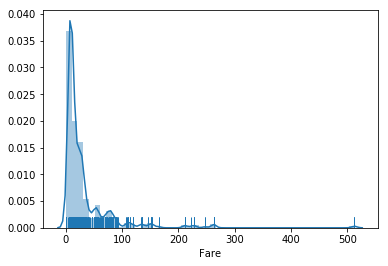

In [140]:
sns.distplot(ti[ti["Fare"].notnull()]["Fare"], rug = True)

In [150]:
# 2) IQR 방식을 이용하여 이상치인 사람들의 정보를 조회하시오.
q1 = ti['Fare'].quantile(.25)
q3 = ti['Fare'].quantile(.75)

iqr = q3-q1
min_iqr = q1 - 1.5 * iqr
max_iqr = 200

min_from_all = ti['Fare'].min()
max_from_all = ti['Fare'].max()

if (min_iqr < min_from_all) :
    min_iqr = min_from_all
if (max_iqr > max_from_all) :
    max_iqr = max_from_all

ti[(ti['Fare'] < min_iqr ) | (ti['Fare'] > max_iqr)].sort_values('Fare2', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Fare2
258,259,1,1,"Ward, Miss. Anna",female,35.0,512.3292,Cherbourg,512.3292
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,Cherbourg,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,Cherbourg,512.3292
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0000,Southhampton,263.0000
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,263.0000,Southhampton,263.0000
438,439,0,1,"Fortune, Mr. Mark",male,64.0,263.0000,Southhampton,263.0000
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,263.0000,Southhampton,263.0000
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,262.3750,Cherbourg,262.3750
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,262.3750,Cherbourg,262.3750
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,247.5208,Cherbourg,247.5208


In [144]:
# 3) 위 1,2번 방식으로 볼 때 이상치를 어떻게 처리하는게 좋을까요?
# 의견과, 그렇게 생각한 이유를 적어봅니다.
# 그리고 자신의 의견대로 이상치를 처리해 봅니다.
# 단 이상치 처리를 위해 기존 Fare를 복사해서 Fare2를 만들고 Fare2에 적용해 봅니다.
ti['Fare2'] = ti['Fare']


